In [416]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [417]:
df = pd.read_csv('termistori.csv', sep=";")
df["T"] = df["T"].astype("float64")
df["R"] = df["R"].astype("float64")
df

,T,R
0,-50.0,367700.0
1,-40.0,204700.0
2,-30.0,118500.0
3,-20.0,71020.0
4,-10.0,43670.0
5,0.0,27700.0
6,10.0,18070.0
7,20.0,12110.0
8,25.0,10000.0
9,30.0,8301.0


In [418]:
df["voltage"] = 3 * df["R"] / (22000 + df["R"]) * 10000
df["voltage"] = df["voltage"].astype("int")
df

,T,R,voltage
0,-50.0,367700.0,28306
1,-40.0,204700.0,27088
2,-30.0,118500.0,25302
3,-20.0,71020.0,22904
4,-10.0,43670.0,19949
5,0.0,27700.0,16720
6,10.0,18070.0,13528
7,20.0,12110.0,10650
8,25.0,10000.0,9375
9,30.0,8301.0,8218


In [419]:
df = df[df['T'] >= 0].copy()
df

,T,R,voltage
5,0.0,27700.0,16720
6,10.0,18070.0,13528
7,20.0,12110.0,10650
8,25.0,10000.0,9375
9,30.0,8301.0,8218
10,40.0,5811.0,6268
11,50.0,4147.0,4758
12,60.0,3011.0,3611
13,70.0,2224.0,2754
14,80.0,1668.0,2114


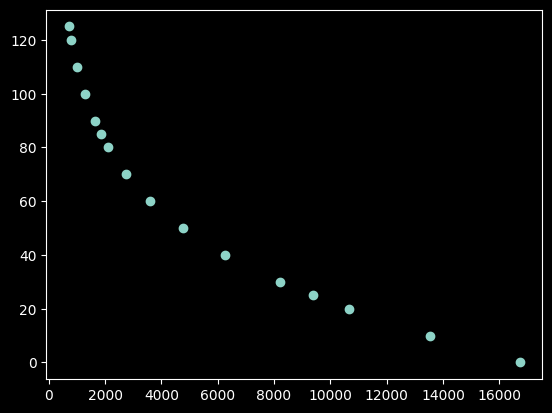

In [420]:
plt.scatter(df["voltage"], df["T"])

In [421]:
#fit = np.polyfit(df["voltage"], df["T"], 4)
def fit_func(x, a, b, c):
    return a * (x**(-b)) + c
fit, var = curve_fit(fit_func, df["voltage"], df["T"])
fit

array([ 1.93252786e+03,  2.42505056e-02, -1.52425977e+03])

In [422]:
df["fit"] = fit[0] * (df["voltage"]**(-fit[1])) + fit[2]
df["fit"] = df["fit"].astype(int)
df

,T,R,voltage,fit
5,0.0,27700.0,16720,2
6,10.0,18070.0,13528,10
7,20.0,12110.0,10650,19
8,25.0,10000.0,9375,23
9,30.0,8301.0,8218,28
10,40.0,5811.0,6268,39
11,50.0,4147.0,4758,49
12,60.0,3011.0,3611,60
13,70.0,2224.0,2754,70
14,80.0,1668.0,2114,80


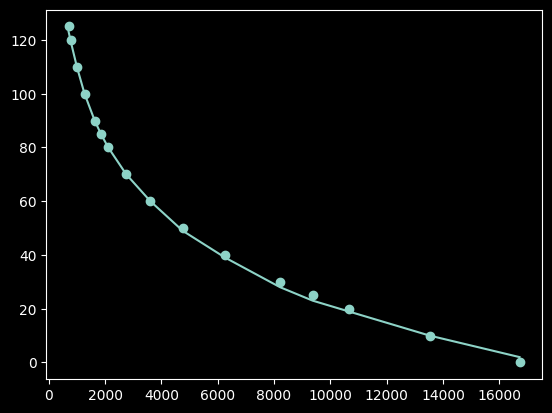

In [423]:
plt.scatter(df["voltage"], df["T"])
plt.plot(df["voltage"], df["fit"])